In [15]:
import numpy as np
import matplotlib.pyplot as plt

from mltools import plot_data, plot_frontiere, make_grid, gen_arti

In [101]:
def mse(w,x,y):
    y = y.reshape(-1, 1)
    w = w.reshape(-1, 1)    
    x = x.reshape(y.shape[0],w.shape[0])
    return ((x.dot(w) - y)**2)

def reglog(w,x,y):
    y = y.reshape(-1, 1)
    w = w.reshape(-1, 1)    
    x = x.reshape(y.shape[0],w.shape[0])
    return np.log(1 + np.exp(-y * np.dot(x,w)))


def mse_grad(w,x,y):
    y = y.reshape(-1, 1)
    w = w.reshape(-1, 1)    
    x = x.reshape(y.shape[0],w.shape[0])
    return x * (x.dot(w)  - y) * 2

def reglog_grad(w,x,y):
    y = y.reshape(-1, 1)
    w = w.reshape(-1, 1)    
    x = x.reshape(y.shape[0],w.shape[0])
    return -y*x / (1 + np.exp(y * x.dot(w)))

def grad_check(f,f_grad,N=100,t=1e-5):
    weights = np.random.rand(N, 1)
    datax = np.random.rand(N, 1)
    datay = np.random.randint(0, 2, N)
    for w in weights:
        values = f(weights, datax, datay)
        valuest = f(w + t, datax, datay)
        pts_grad = f_grad(w, datax, datay)
        res1,res2 = (valuest - values)/t,pts_grad
        print(np.max(np.abs(res1 - res2)) < t)
        
        
def descente_gradient(datax,datay,f_loss,f_grad,eps,num_iter):
    wst  = np.array([0,-100]) 
    w = []
    costs=[]
    for i in range(num_iter):
        gradient = f_grad(wst,datax,datay)
        wst = wst - eps * gradient.mean(axis=0)
        w+=[wst]
        costs+=[f_loss(wst,datax,datay).mean(axis=0)]
    return wst,w, costs
    

In [105]:
def plot_costs_evo(costs, num_iter):
    values = range(num_iter)
    values = np.array(values)
    plt.figure()
    plt.title('Evolution du coût en fonction des itérations')
    plt.xlabel('Iterations')
    plt.ylabel('Coûts')
    plt.plot(values,costs)
    
def plot_traj(w,f):
    plt.figure()
    plt.title("Evolution de w")
    plt.ylabel("w")
    plt.xlabel("Iterations")
    grid, x, y = make_grid(xmin=-100, xmax=100, ymin=-100, ymax=100, step=100)
    plt.contourf(x,y,np.array([f(w,datax,datay).mean() for w in grid]).reshape(x.shape),levels=50)
    for ws in w:
        plt.plot(ws[0],ws[1],color='red',marker='.',markersize=10)

#  Cas données séparables

(1000, 2)


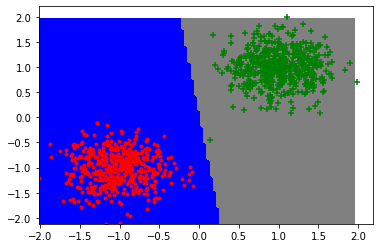

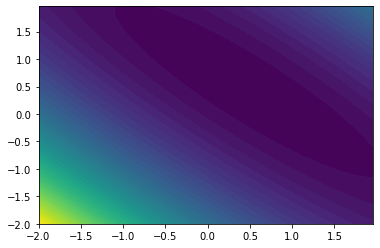

In [127]:
datax, datay = gen_arti(epsilon=0.1)
grid, x, y = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)
plt.figure()
## Visualisation des données et de la frontière de décision pour un vecteur de poids w
print(datax.shape)
w = np.random.randn(datax.shape[1],1)
plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
plot_data(datax,datay)
## Visualisation de la fonction de coût en 2D
plt.figure()
plt.contourf(x,y,np.array([mse(w,datax,datay).mean() for w in grid]).reshape(x.shape),levels=50)

# Regression linéaire

C:\Users\94\anaconda3\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-101-5ea764a22559>:5: RuntimeWarning: overflow encountered in square
  return ((x.dot(w) - y)**2)
C:\Users\94\anaconda3\lib\site-packages\matplotlib\contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\94\anaconda3\lib\site-packages\matplotlib\contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


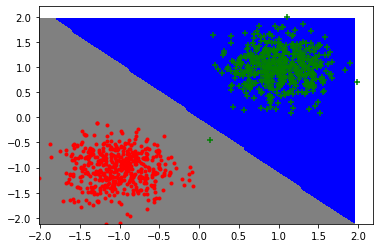

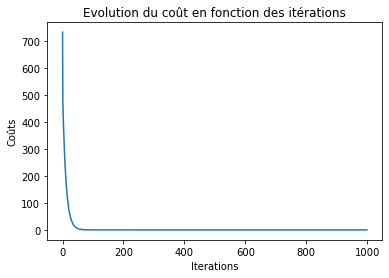

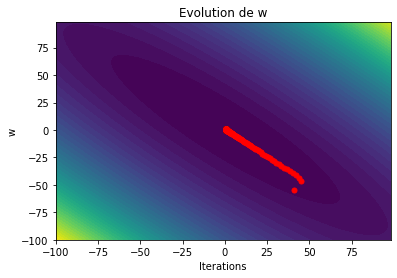

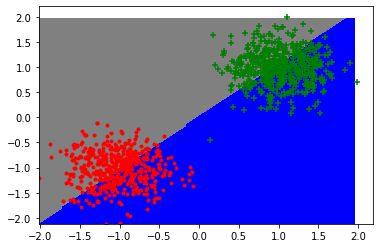

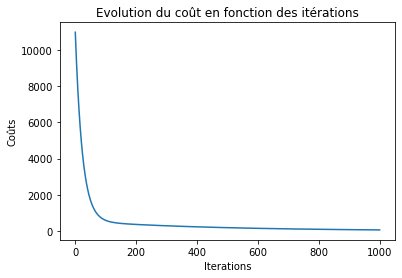

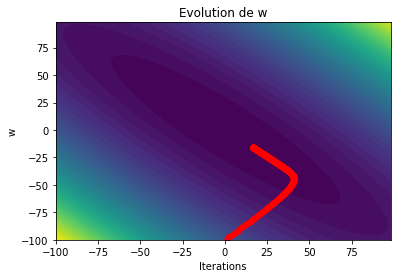

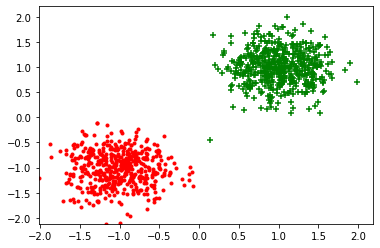

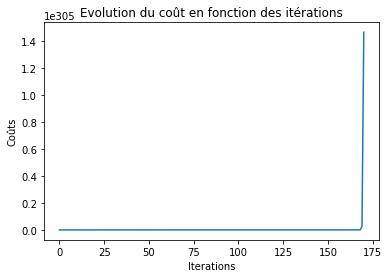

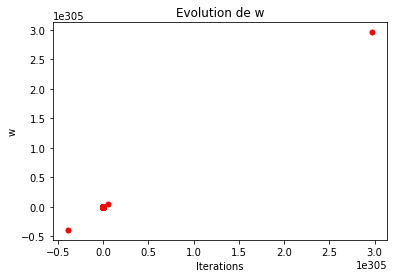

In [129]:
num_iter = 1000
eps = [0.2, 0.005, 2]
for e in eps : 
    w_opti, w, costs = descente_gradient(datax,datay,mse,mse_grad,e, num_iter)

    plt.figure() 
    #plt.title("Frontière de décision avec eps = ", e)
    plot_frontiere(datax,lambda x : np.sign(x.dot(w_opti)),step=100)
    plot_data(datax,datay)


    plot_costs_evo(costs, num_iter)

    plot_traj(w,mse)



In [134]:
# TODO : Commenter les résultats

# Regression logistique

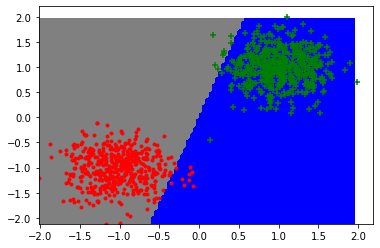

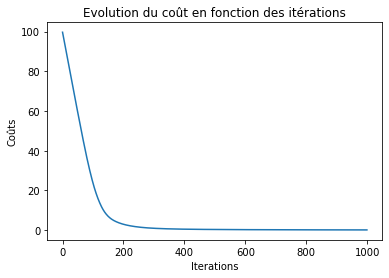

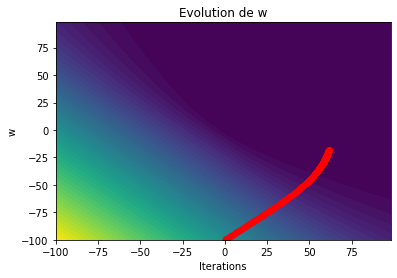

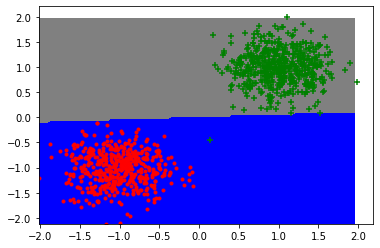

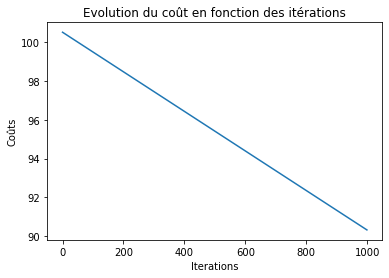

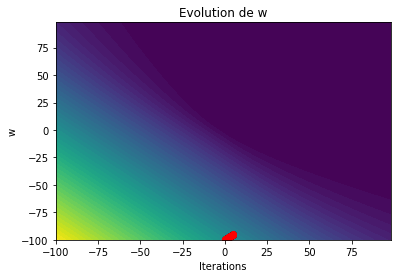

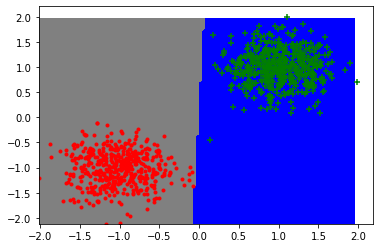

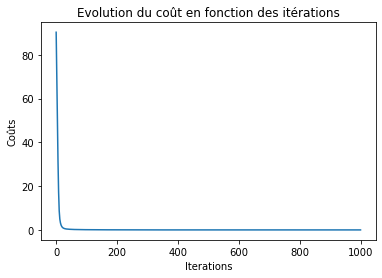

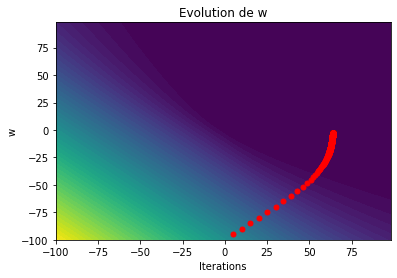

In [130]:
num_iter = 1000
eps = [0.4, 0.005, 5]

for e in eps : 
    w_opti, w, costs = descente_gradient(datax,datay,reglog,reglog_grad,e,num_iter)

    plt.figure() 
    plot_frontiere(datax,lambda x : np.sign(x.dot(w_opti)),step=100)
    plot_data(datax,datay)
    plot_costs_evo(costs, num_iter)

    plot_traj(w,reglog)

In [135]:
# TODO : Commenter les résultats

# Cas données inséparables

(1000, 2)


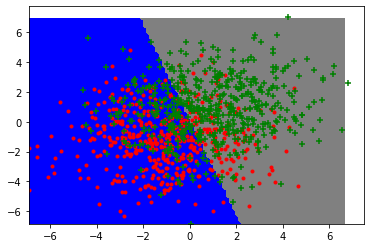

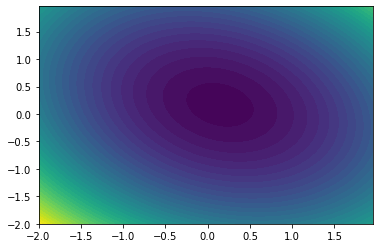

In [131]:
datax, datay = gen_arti(epsilon=2)
grid, x, y = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)
plt.figure()
## Visualisation des données et de la frontière de décision pour un vecteur de poids w
print(datax.shape)
w = np.random.randn(datax.shape[1],1)
plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
plot_data(datax,datay)
## Visualisation de la fonction de coût en 2D
plt.figure()
plt.contourf(x,y,np.array([mse(w,datax,datay).mean() for w in grid]).reshape(x.shape),levels=50)

# Regression Linéaire

C:\Users\94\anaconda3\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-101-5ea764a22559>:5: RuntimeWarning: overflow encountered in square
  return ((x.dot(w) - y)**2)
C:\Users\94\anaconda3\lib\site-packages\matplotlib\contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\94\anaconda3\lib\site-packages\matplotlib\contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


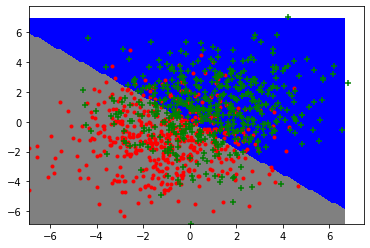

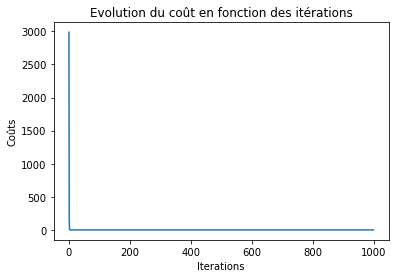

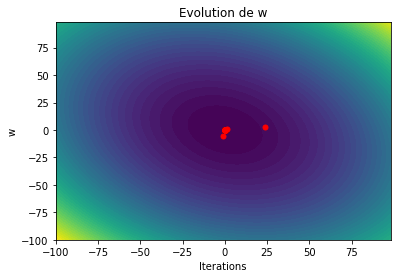

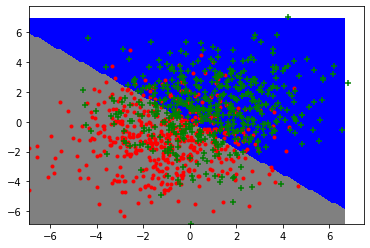

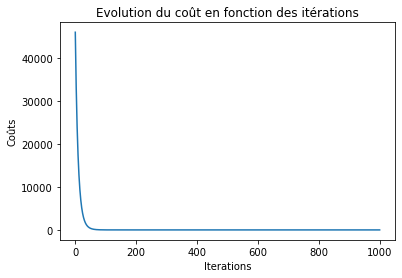

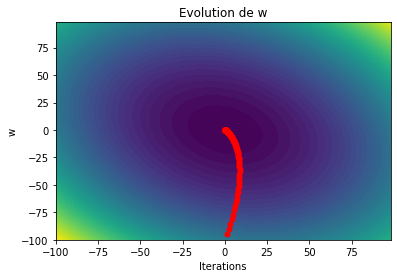

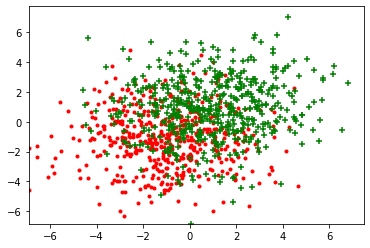

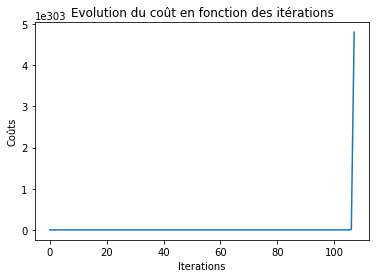

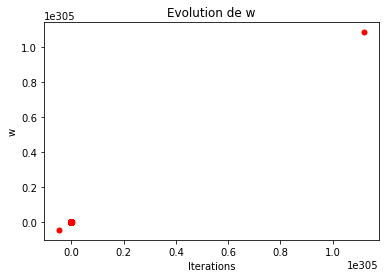

In [136]:
num_iter = 1000
eps = [0.1, 0.005, 2]
for e in eps : 
    w_opti, w, costs = descente_gradient(datax,datay,mse,mse_grad,e, num_iter)

    plt.figure() 
    #plt.title("Frontière de décision avec eps = ", e)
    plot_frontiere(datax,lambda x : np.sign(x.dot(w_opti)),step=100)
    plot_data(datax,datay)


    plot_costs_evo(costs, num_iter)

    plot_traj(w,mse)


In [137]:
# TODO : Commenter les résultats

# Regression Logistique

<ipython-input-101-5ea764a22559>:11: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(-y * np.dot(x,w)))
<ipython-input-101-5ea764a22559>:11: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(-y * np.dot(x,w)))
<ipython-input-101-5ea764a22559>:11: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(-y * np.dot(x,w)))


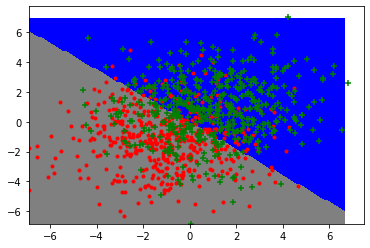

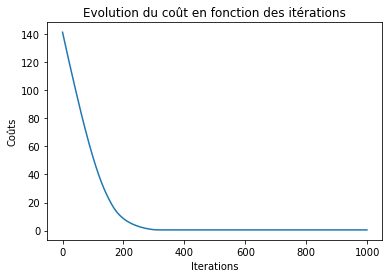

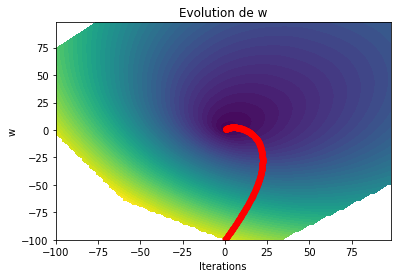

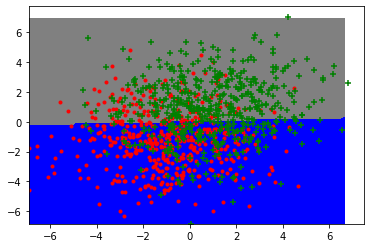

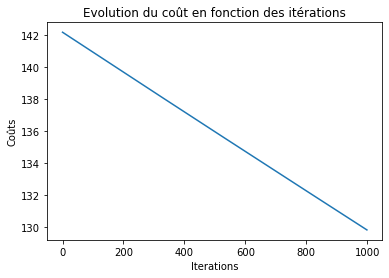

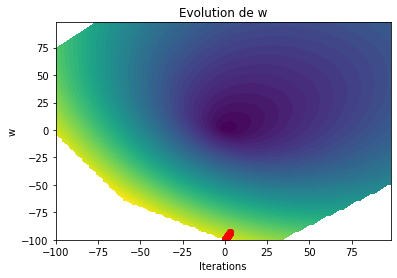

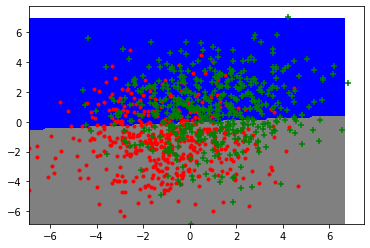

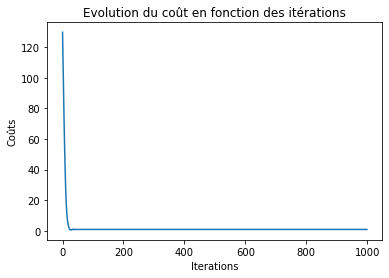

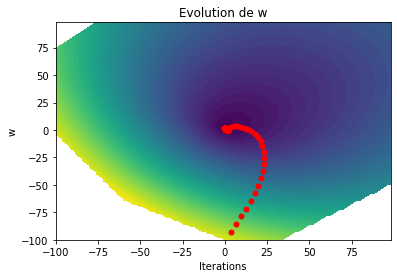

In [133]:
num_iter = 1000
eps = [0.4, 0.005, 5]

for e in eps : 
    w_opti, w, costs = descente_gradient(datax,datay,reglog,reglog_grad,e,num_iter)

    plt.figure() 
    plot_frontiere(datax,lambda x : np.sign(x.dot(w_opti)),step=100)
    plot_data(datax,datay)
    plot_costs_evo(costs, num_iter)

    plot_traj(w,reglog)

In [138]:
# TODO : Commenter les résultats